[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gsg213/Computer_Vision_DL/blob/master/MaskRCNN/Mask_RCNN.ipynb)

clone the ANN from MatterPort, with setup.py install all requirements for this network

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
%%shell
git clone https://github.com/matterport/Mask_RCNN
cd Mask_RCNN
python setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 23.10 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdis

In [ ]:
pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Using the model as FasterRCNN

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt 

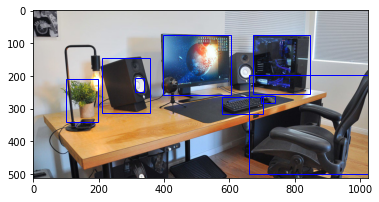

In [ ]:
img = load_img('/content/drive/MyDrive/AI_S/CVwDL/FRCNN/pedestrians/mask1.jpg')
img_a = img_to_array(img)

resultado =  model.detect([img_a], verbose = 0)
cajas = resultado[0]['rois']

plt.imshow(img)

ax = plt.gca()

for b in cajas:
  y1,x1,y2,x2 = b
  w = x2-x1
  h = y2-y1
  rect = Rectangle((x1,y1),w,h, fill = False, color= 'blue')
  ax.add_patch(rect)
plt.show()

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Processing 1 images
image                    shape: (424, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


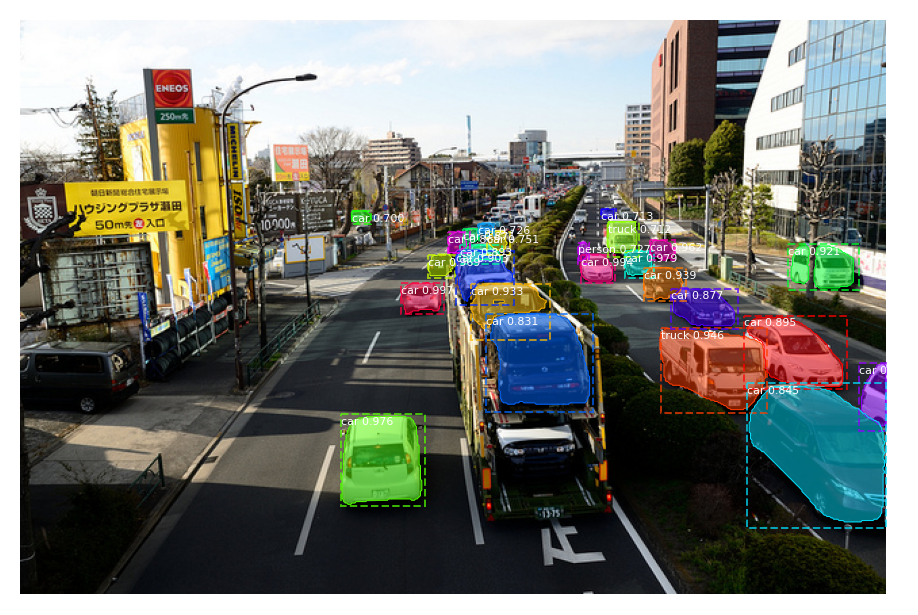

In [ ]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
#visualize.display_instances(image, r['rois'][:1], r['masks'][:,:,:1], r['class_ids'][:1], 
                            #class_names, r['scores'][:1])

In [ ]:
!mkdir -p '/content/drive/MyDrive/MaskRCNN'

In [ ]:
import cv2
import numpy as np

In [ ]:
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
import glob

In [ ]:
def random_colors(N): 
  np.random.seed(1) 
  colors = [tuple(255 * np.random.rand(3)) for _ in range(N)] 
  return colors

def apply_mask(image, mask, color, alpha=0.5): 
  """apply mask to image""" 
  for n, c in enumerate(color): 
    image[:, :, n] = np.where(mask == 1, 
                              image[:, :, n] * (1 - alpha) + alpha * c, 
                              image[:, :, n] ) 
  return image

def display_instances(image, boxes, masks, ids, names, scores): 
  """ take the image and results and apply the mask, box, and Label """ 
  n_instances = boxes.shape[0] 
  colors = random_colors(n_instances) 
  if not n_instances: 
    print('NO INSTANCES TO DISPLAY') 
  else: 
    assert boxes.shape[0] == masks.shape[-1] == ids.shape[0] 

  for i, color in enumerate(colors):
    if not np.any(boxes[i]): 
      continue 

    y1, x1, y2, x2 = boxes[i] 
    label = names[ids[i]] 
    score = scores[i] if scores is not None else None 
    caption = '{} {:.2f}'.format(label, score) if score else label 
    mask = masks[:, :, i] 
    image = apply_mask(image, mask, color) 
    image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2) 
    image = cv2.putText( image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2 ) 
  return image

In [ ]:
# Capturar el video y procesarlo frame a frame
cap = cv2.VideoCapture('./pedestrians/pedestrians.mp4')
frame_count = 0
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

while True:
  ret, frame = cap.read()
  if not ret:
    break
  frame_count += 1
  print('Numero de frames: {0}'.format(frame_count))
  results = model.detect([frame], verbose = 0)
  r = results[0]
  frame = display_instances(frame, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
  fname = '{0}.jpg'.format(frame_count)
  fname = os.path.join('/content/drive/MyDrive/MaskRCNN', fname)
  cv2.imwrite(fname, frame)
  print('Archivo fue escrito en: {0}'.format(fname))
cap.release()

In [ ]:
images = list(glob.iglob('/content/drive/MyDrive/MaskRCNN/*.jpg'))
images = sorted(images, key = lambda x: float(os.path.split(x)[1][:-3]))
video_output = os.path.join('/content/drive/MyDrive/MaskRCNN', 'enmascarado.mp4')
fourcc = VideoWriter_fourcc(*'MJPG')
vid = None
size = None
is_color = True
for image in images:
  img = imread(image)
  if vid is None:
    if size is None:
      size = img.shape[1], img.shape[0]
    vid = VideoWriter(video_output, fourcc, float(30), size, is_color)
  if size[0] != img.shape[1] and size[1] != img.shape[0]:
    img = resize(img, size)
  if vid is not None:
    vid.write(img)
vid.release()